# Task 2.3 Visualization Fundamentals Sample Size DataFrame

In [3]:
# import libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [5]:
# import limited file, too big for my computer
df = pd.read_csv('NY_Citi_Bike_Weather_Data.csv', usecols=['date', 'avgTemp', 'ride_id'])

In [7]:
# create another smaller df
df_sample = df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

C:\Users\lisag\AppData\Local\Temp\ipykernel_3372\625819924.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [14]:
df_sample.columns

Index(['ride_id', 'date', 'avgTemp'], dtype='object')

In [26]:
df.shape

(29838806, 3)

In [16]:
df_sample.shape

(2983883, 3)

In [19]:
df_sample.dtypes

ride_id     object
date        object
avgTemp    float64
dtype: object

In [22]:
df_sample['date'] = pd.to_datetime(df_sample['date'])

In [24]:
df_sample.head()

,ride_id,date,avgTemp
698059,17CAE86EB6452614,2022-01-01,11.6
458139,97F64F760630BEA9,2022-01-01,11.6
520477,BC170BC3C4B22E80,2022-01-01,11.6
301426,E8036EE0B9BDE354,2022-01-01,11.6
776821,3BED0769F5A1A716,2022-01-01,11.6


# Pandas Plot of 2022 Weather

In [31]:
df_sample = df_sample.set_index('date')

<Axes: xlabel='date'>

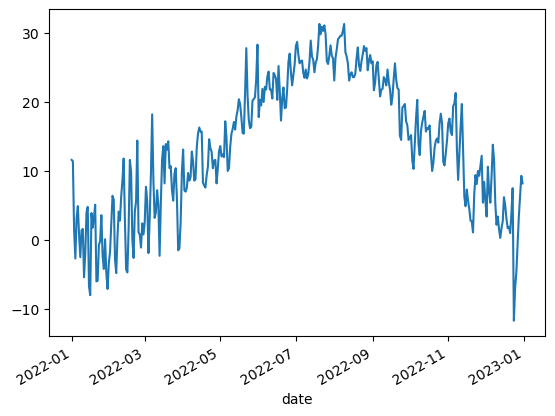

In [34]:
df_sample['avgTemp'].plot()

# Aggregate Trip Data

In [37]:
# add new column of total trip counts by date
df['trip_count'] = df.groupby('date')['ride_id'].transform('count')

In [39]:
# add new column of total trip counts by date
df_sample['trip_count'] = df_sample.groupby('date')['ride_id'].transform('count')

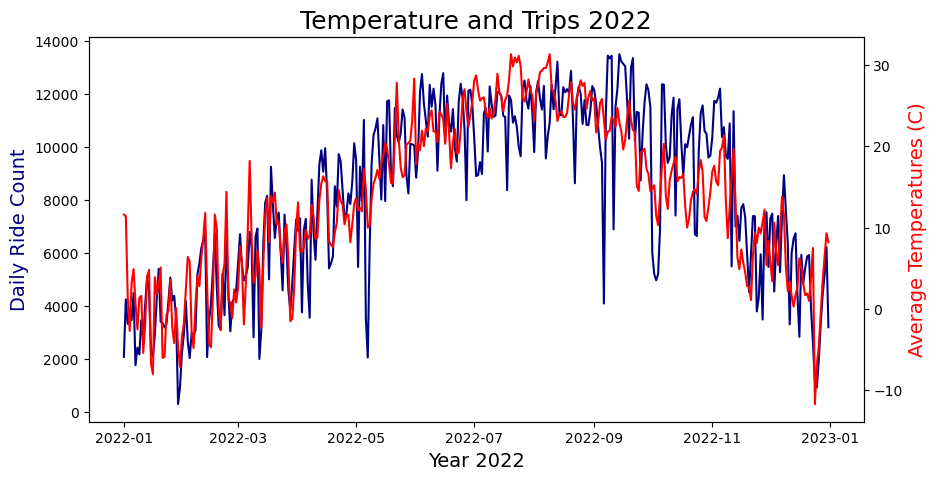

In [50]:
# create figure and axis objects with subplots() and details
fig,ax = plt.subplots(figsize=(10, 5))

# make a plot of the bike rides
ax.plot(df_sample['trip_count'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily Ride Count",color = "navy", fontsize = 14) # set y-axis label

# initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_sample["avgTemp"], color = "red")
ax2.set_ylabel("Average Temperatures (C)", color = "red",fontsize=14)
plt.title('Temperature and Trips 2022', fontsize = 18)
plt.show()

#### Matplotlib was used to achieve this by creating two separate plots and then having them share their common x-axis. This is an Object-Oriented Approach as essentially each individual graph is made into its own object and then these objects are combined.

In [53]:
plt.style.use('ggplot')

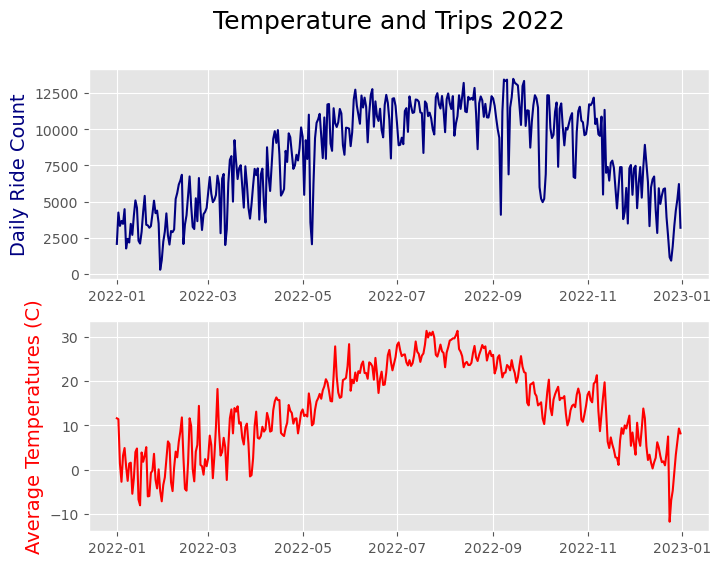

In [56]:
# create figure and axis objects with subplots() and details
fig,ax = plt.subplots(2, figsize =(8, 6))

# make a plot of the bike rides
ax[0].plot(df_sample['trip_count'],color = "navy")
ax[0].set_ylabel("Daily Ride Count",color = "navy", fontsize = 14) # set y-axis label

# make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_sample["avgTemp"], color = "red")
ax[1].set_ylabel("Average Temperatures (C)", color = "red",fontsize=14)
plt.suptitle('Temperature and Trips 2022', fontsize = 18)

plt.show()

# Histogram Creation

In [61]:
# import limited file, too big for my computer
df_types = pd.read_csv('NY_Citi_Bike_Weather_Data.csv', usecols=['rideable_type', 'member_casual'])

In [63]:
# create another smaller df
df_sample_types = df_types.groupby('rideable_type', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

C:\Users\lisag\AppData\Local\Temp\ipykernel_3372\3743754354.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample_types = df_types.groupby('rideable_type', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


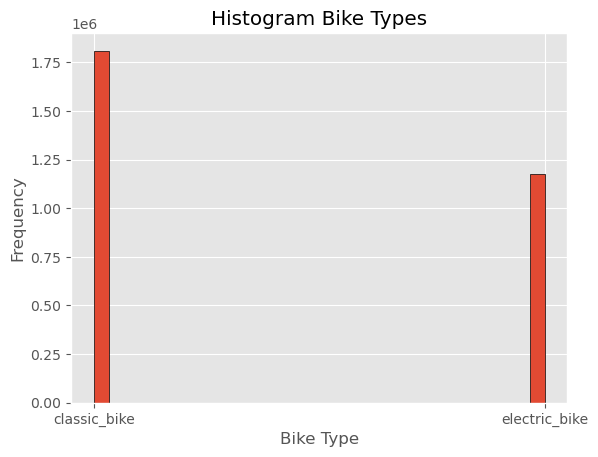

In [66]:
df_sample_types['rideable_type'].hist(bins=30, edgecolor='black')
plt.xlabel('Bike Type')
plt.ylabel('Frequency')
plt.title('Histogram Bike Types')
plt.show()

#### I know this isn't the best example for a histogram, but ride duration is not available in the 2022 data sets.

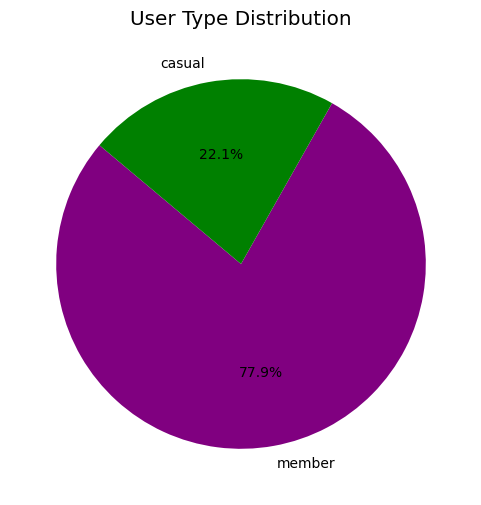

In [73]:
# create pie chart
# count occurrences of each category
counts = df_sample_types['member_casual'].value_counts()

# pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['purple', 'green'], startangle=140)

# title
plt.title('User Type Distribution')

# show plot
plt.show()

#### The data required for the Bonus Tasks as stated in the lesson is not available, so I tried to just practice skills.